## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/DELL/Desktop/ml_project/Copper_Set.csv')
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8608\1863345225.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:/Users/DELL/Desktop/ml_project/Copper_Set.csv')


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


## Checking for duplicate rows

In [3]:
a=len(df)
print('Original dataframe length',a)
df.drop_duplicates(inplace=True)
b=len(df)
print('Dataframe length after dropping duplicate rows',b)
print('No of duplicate rows removed',a-b)

Original dataframe length 181673
Dataframe length after dropping duplicate rows 181673
No of duplicate rows removed 0


## Removing unwanted rows 

In [4]:
u=df[df.material_ref.str.contains("00000000000000000000",na=False)].material_ref.value_counts().index
print(u,'\n')
print('No. of unwanted values in "material_ref" column: ',len(u))

Index(['0000000000000000000000000000000020000069',
       '0000000000000000000000000000000000101953',
       '0000000000000000000000000000000000102062',
       '0000000000000000000000000000002203502250',
       '0000000000000000000000000000000000101890',
       '0000000000000000000000000000000000102085',
       '0000000000000000000000000000000000102030',
       '0000000000000000000000000000000000102056',
       '0000000000000000000000000000000000057390',
       '0000000000000000000000000000000003076167',
       ...
       '0000000000000000000000000000000000890550',
       '0000000000000000000000000000000000094371',
       '0000000000000000000000000000000000124198',
       '0000000000000000000000000000000000048065',
       '0000000000000000000000000000000000124200',
       '0000000000000000000000000000000015066376',
       '0000000000000000000000000000000015066371',
       '0000000000000000000000000000000015066370',
       '0000000000000000000000000000000000094369',
       '000000000000

In [5]:
# Im dropping the rows containing '00000000000' values in the 'material_ref' column
# and taking a new dataset "df1"

df1=df[~df.material_ref.str.contains("00000000000000000000",na=False)] #na=False-->to ignore NaN columns
print('Length of dataframe after removing unwanted rows: ',len(df1))

Length of dataframe after removing unwanted rows:  158983


## Checking for correlation between features

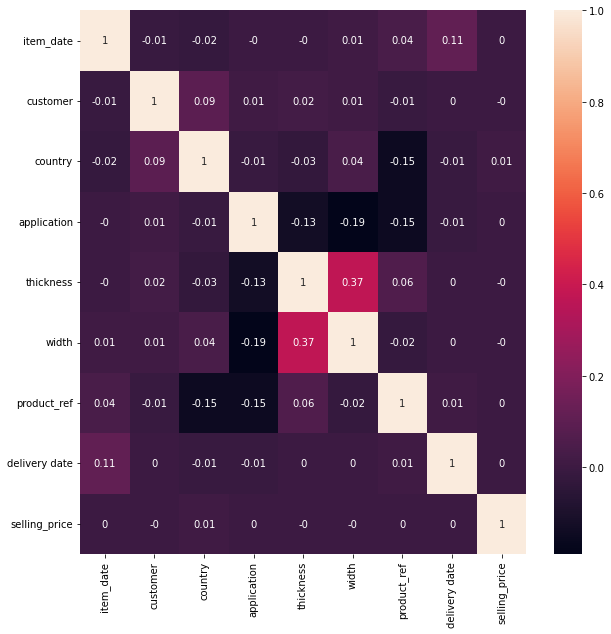

In [6]:
corr_mat = df1.corr().round(2)
plt.subplots(figsize=(10,10))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

*Not much correlation between features except 'thickness' and 'width'*

## Dataset shape and checking the null,unique values in each column

In [7]:
df1.shape

(158983, 14)

In [8]:
pd.DataFrame({'dtypes':df1.dtypes,'null_count':df1.isnull().sum(),'unique_values':df1.nunique(),
             'percent_of_null_values':df1.isnull().mean()})


,dtypes,null_count,unique_values,percent_of_null_values
id,object,2,158981,0.000013
item_date,float64,1,251,0.000006
quantity tons,object,0,158983,0.000000
customer,float64,1,1134,0.000006
country,float64,28,17,0.000176
status,object,2,9,0.000013
item type,object,0,7,0.000000
application,float64,24,30,0.000151
thickness,float64,1,569,0.000006
width,float64,0,1269,0.000000


**'material_ref ' column contains 49% of missing values,other columns contain less than 1% of missing data**

- Im dropping all rows which has less than 1% missing data in its respective columns

In [9]:
df1.dropna(subset=['item_date','customer', 'country', 'status',
       'application', 'thickness',
       'delivery date','selling_price'],inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8608\4058792996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['item_date','customer', 'country', 'status',


In [10]:
pd.DataFrame({'dtypes':df1.dtypes,'null_count':df1.isnull().sum(),'unique_values':df1.nunique(),
             'percent_of_null_values':df1.isnull().mean()})

,dtypes,null_count,unique_values,percent_of_null_values
id,object,2,158946,0.000013
item_date,float64,0,251,0.000000
quantity tons,object,0,158948,0.000000
customer,float64,0,1132,0.000000
country,float64,0,17,0.000000
status,object,0,9,0.000000
item type,object,0,7,0.000000
application,float64,0,30,0.000000
thickness,float64,0,569,0.000000
width,float64,0,1269,0.000000


**Since 'material_ref' column has 49% missing data I'll impute missing values later**

### Finding mixed datatypes  in column(2) i.e 'quantity ton'

In [11]:
o=list(df1['quantity tons']) #this column contains values which has mixed datatypes('float','string')

x=[]                        #to store original float values,and original string values 
                            #typecasted to float

z=[]                        #to store the index of the 'odd' value in the column
z1=[]                       #to store the 'odd' value in the column
for i in o:
    try:
        if i==float(i):
            x.append(i)
        else:
            x.append(float(i))
    except ValueError:
        z1.append(i)
        z.append(o.index(i))
print('Length of the dataset after finding the unrequired value: ',len(x))
print('Unrequired value: ',z1)
df1.iloc[z]

Length of the dataset after finding the unrequired value:  158947
Unrequired value:  ['e']


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
173086,3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD,20200714.0,e,30157111.0,78.0,Won,W,41.0,0.5,1000.0,NaN,164141591,20200801.0,672.0


In [12]:
# Dropping row 173086

df1.drop(173086,inplace=True)
df1.shape

C:\Users\DELL\AppData\Local\Temp\ipykernel_8608\121019831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(173086,inplace=True)


(158947, 14)

In [13]:
df1.shape

(158947, 14)

In [14]:
# Converting the 'quantity tons' column datatype from object to 'float'

df1["quantity tons"] = pd.to_numeric(df1["quantity tons"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8608\1925358694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["quantity tons"] = pd.to_numeric(df1["quantity tons"])


## Checking outliers in numerical variables

In [15]:
#from sklearn.model_selection import train_test_split
def plots(df1, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[variable])
    plt.title('Boxplot')
    plt.show()

In [16]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

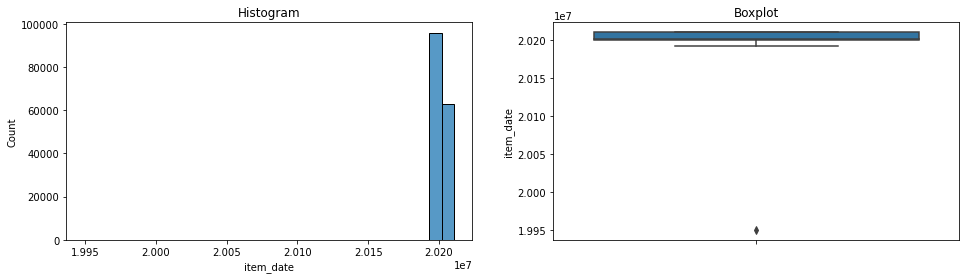

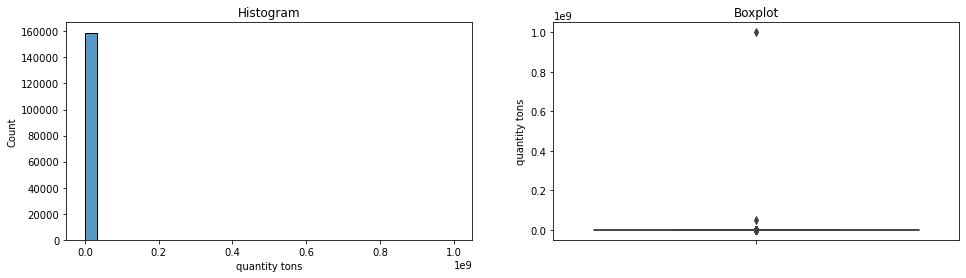

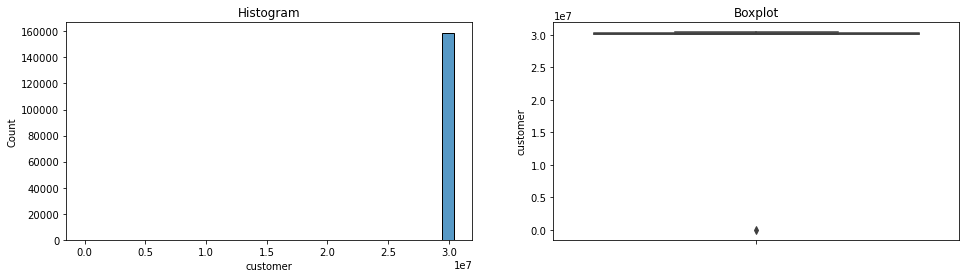

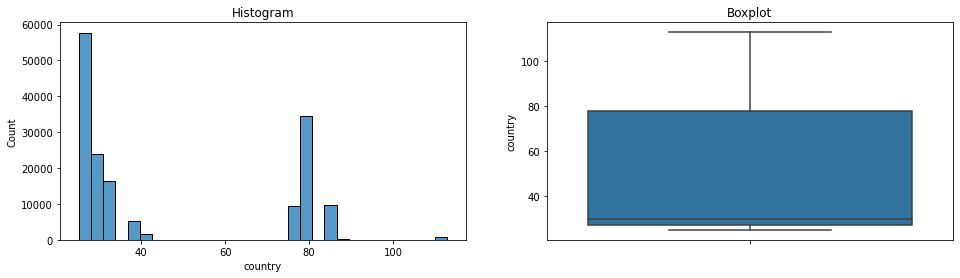

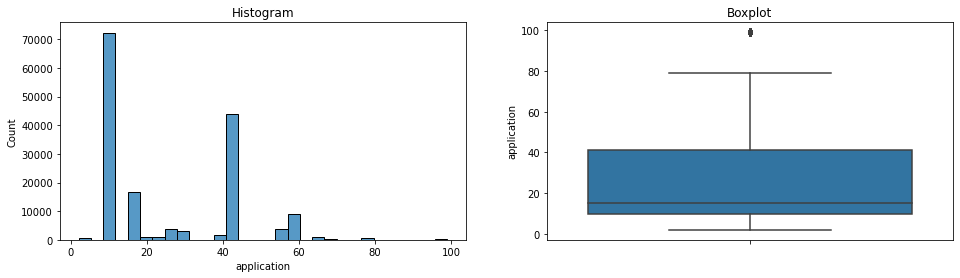

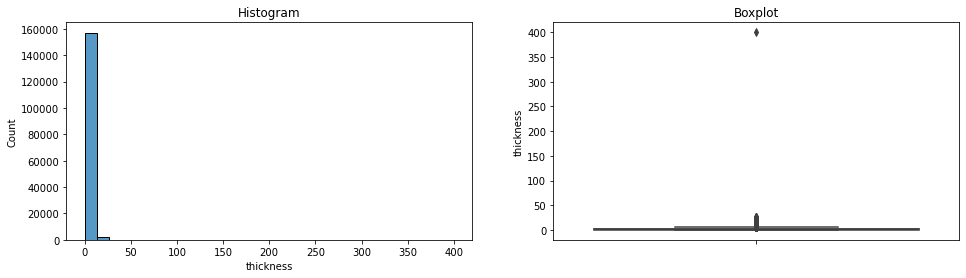

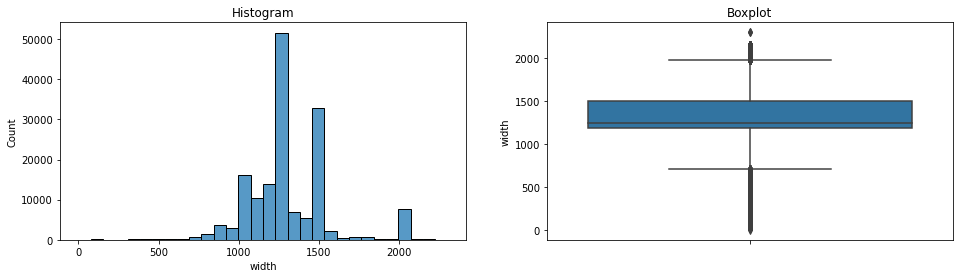

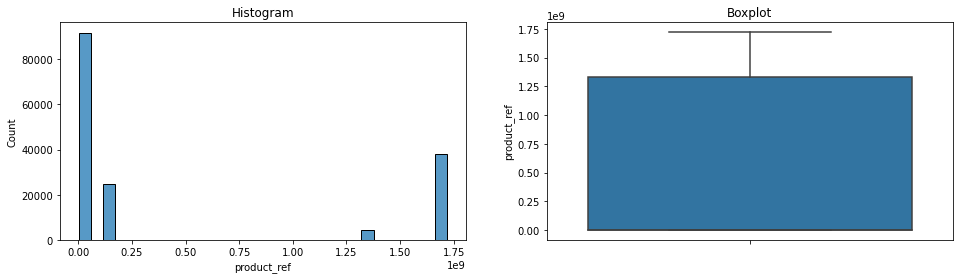

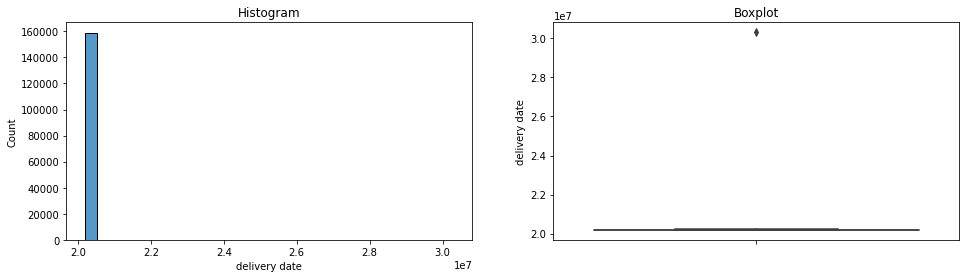

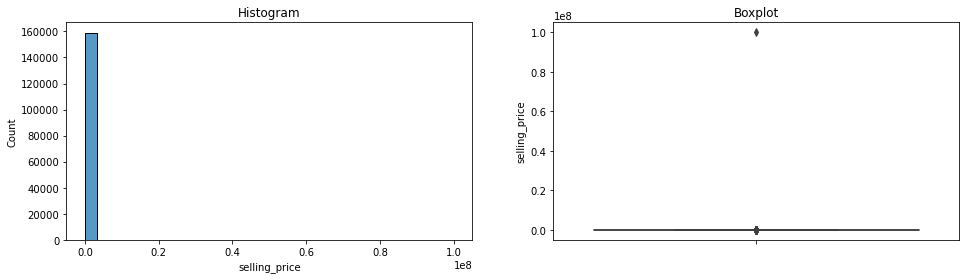

In [17]:
for j in ['item_date', 'quantity tons', 'customer', 'country', 
        'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']:
    plots(df1,j)

**'item_date', 'quantity tons', 'customer', 'country', 
       'application', 'thickness', 'width',
      'product_ref', 'delivery date', 'selling_price'-Among these columns only 'country' and 
      'product_ref does'nt have any outliers**

## Finding the upper and lower limit to replace outliers

In [18]:
def find_skewed_boundaries(df1, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = df1[variable].quantile(0.75) - df1[variable].quantile(0.25)

    lower_boundary = df1[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df1[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [19]:
item_date_upper_limit, item_date_lower_limit = find_skewed_boundaries(df1, 'item_date', 1.5)
item_date_upper_limit, item_date_lower_limit

(20224115.5, 20187015.5)

In [20]:
quantity_tons_upper_limit, quantity_tons_lower_limit = find_skewed_boundaries(df1, 'quantity tons', 1.5)
quantity_tons_upper_limit, quantity_tons_lower_limit

(155.27710874000002, -72.95759886)

In [21]:
customer_upper_limit, customer_lower_limit = find_skewed_boundaries(df1, 'customer', 1.5)
customer_upper_limit, customer_lower_limit

(30462334.0, 29987446.0)

In [22]:
application_upper_limit, application_lower_limit = find_skewed_boundaries(df1, 'application', 1.5)
application_upper_limit, application_lower_limit

(87.5, -36.5)

In [23]:
thickness_upper_limit, thickness_lower_limit = find_skewed_boundaries(df1, 'thickness', 1.5)
thickness_upper_limit, thickness_lower_limit

(6.449999999999999, -2.75)

In [24]:
width_upper_limit, width_lower_limit = find_skewed_boundaries(df1, 'width', 1.5)
width_upper_limit, width_lower_limit

(1975.5, 707.5)

In [25]:
delivery_date_upper_limit, delivery_date_lower_limit = find_skewed_boundaries(df1, 'delivery date', 1.5)
delivery_date_upper_limit, delivery_date_lower_limit

(20224351.0, 20187151.0)

In [26]:
selling_price_upper_limit, selling_price_lower_limit = find_skewed_boundaries(df1, 'selling_price', 1.5)
selling_price_upper_limit, selling_price_lower_limit

(1387.5, 231.5)

## Replacing outliers with upper and lower limits

In [27]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [28]:
replace_outlier(df1,'item_date',item_date_upper_limit, item_date_lower_limit)
replace_outlier(df1,'quantity tons',quantity_tons_upper_limit, quantity_tons_lower_limit)
replace_outlier(df1,'customer',customer_upper_limit, customer_lower_limit)
replace_outlier(df1,'application',application_upper_limit, application_lower_limit)
replace_outlier(df1,'thickness',thickness_upper_limit, thickness_lower_limit)
replace_outlier(df1,'width',width_upper_limit, width_lower_limit)
replace_outlier(df1,'delivery date',delivery_date_upper_limit, delivery_date_lower_limit)
replace_outlier(df1,'selling_price',selling_price_upper_limit, selling_price_lower_limit)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8608\2124908812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,


## Checking for outlier's after replacing the outliers with upper and lower limit values

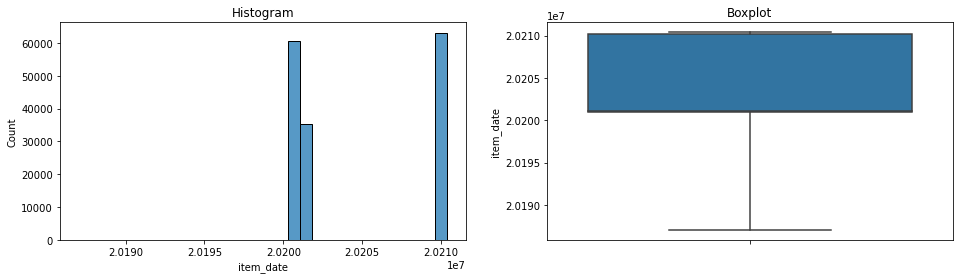

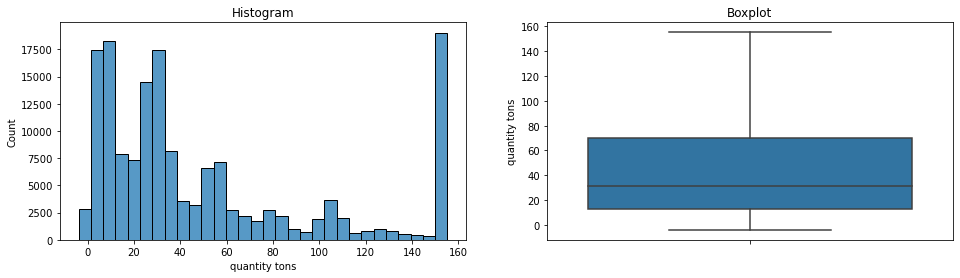

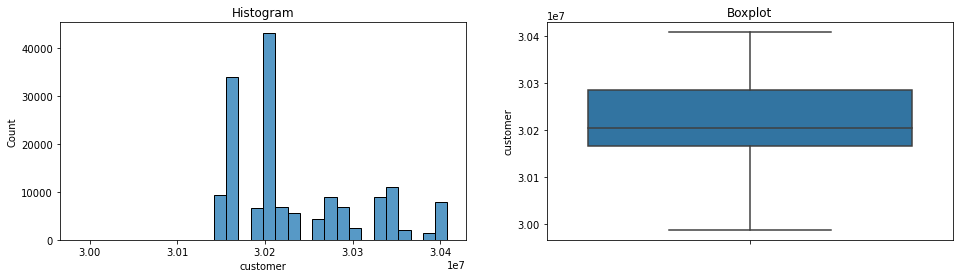

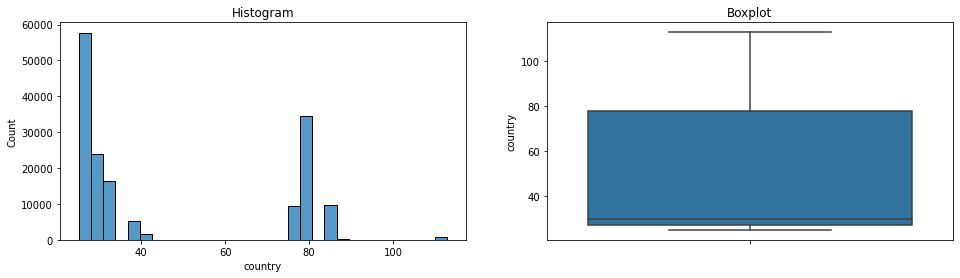

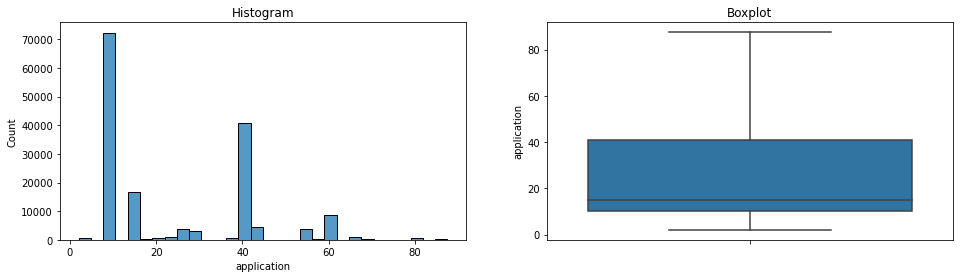

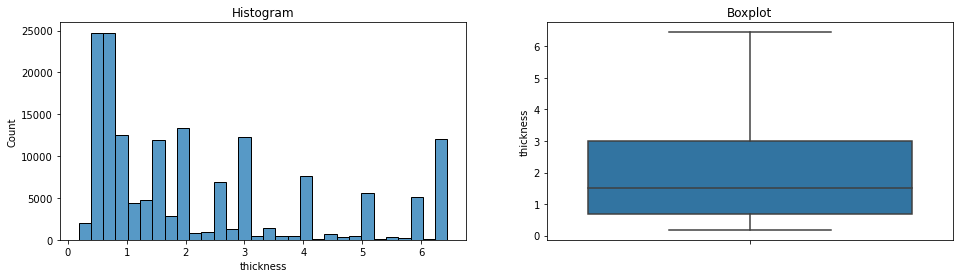

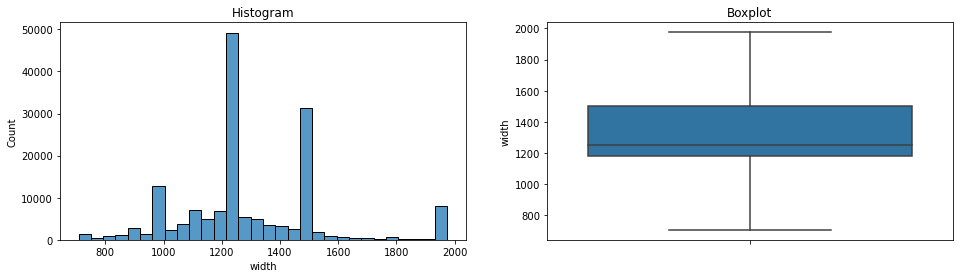

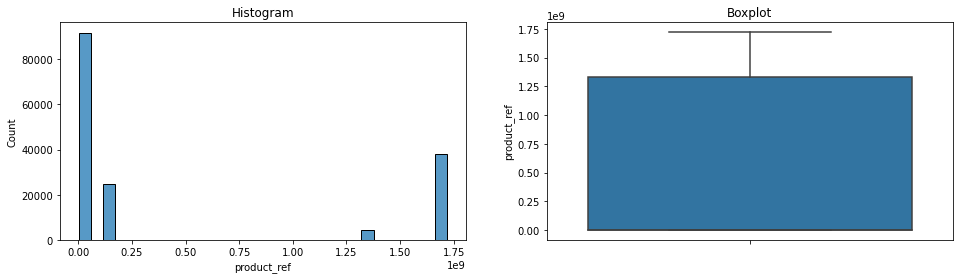

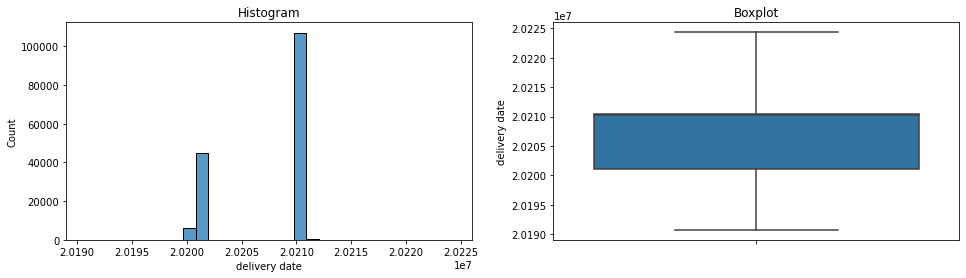

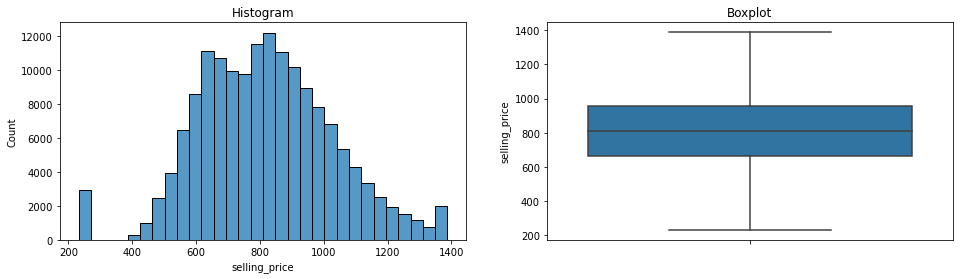

In [29]:
for j in ['item_date', 'quantity tons', 'customer', 'country', 
        'application', 'thickness', 'width',
       'product_ref', 'delivery date', 'selling_price']:
    plots(df1,j)

**Outliers are replaced with the upper and lower limits of their respective columns
-->outliers are corrected but there is a change in distribution**

## Splitting the dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df1.iloc[:, 1:-1]
y = df1.iloc[:, -1]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2023,
)

X_train.shape, X_test.shape

((127157, 12), (31790, 12))

### Missing data imputation for 'material_ref' column

In [33]:
# Getting a list of all the unique values from the country column 

m=list(X_train['country'].unique())
print(m)

[27.0, 32.0, 78.0, 25.0, 26.0, 84.0, 39.0, 30.0, 77.0, 28.0, 38.0, 113.0, 80.0, 79.0, 40.0, 89.0, 107.0]


In [34]:
# Grouping the dataset based on country and  finding the most frequent 'material_ref' value 

t=[]    # List of unique countries 
t1=[]   # List of the most frequent 'material_ref' value corresponding to each country

for country in m:
    p=X_train[(X_train['country']== country)][X_train.columns]
    p1=p['material_ref'].mode()
    t.append(country)
    
    try:
        t1.append(p1.iloc[0])
    
    except IndexError: # Country=89.0 has NaN values on all its 'material_ref' column 
        t1.append('missing')
    
    #print('country no.: ',country,'\n','frequently occurring material_ref: ',p1,'\n')
print(t)
print(t1)

[27.0, 32.0, 78.0, 25.0, 26.0, 84.0, 39.0, 30.0, 77.0, 28.0, 38.0, 113.0, 80.0, 79.0, 40.0, 89.0, 107.0]
['DC01', 'S235JR+AR LARG SUP 1500 CVLT', 'G9010', 'HC220CA', 'PI_S235JR-CL1', 'DC01', 'HC220CA', 'S220GD+Z275 MAC_GALV EDGES', 'CONSIGNMENT STOCK', 'NEQ1 S355J2+N', 'S235JR+AR-CL1', 'S220GD+Z', 'U70137K', 'A2_BQ_SB', '-', 'missing', 'BP001382']


In [35]:
(X_train.loc[(X_train['country']==89.0),:])

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
153949,20200826.0,25.356944,30218743.0,89.0,Lost,S,15.0,0.50,1250.0,NaN,1668701376,20201101.0
147922,20200907.0,109.052031,30198152.0,89.0,Lost,S,10.0,2.50,840.0,NaN,1670798778,20201201.0
157457,20200818.0,57.719367,30218453.0,89.0,Won,S,15.0,2.50,1105.0,NaN,628377,20200701.0
160647,20200806.0,14.480715,30157211.0,89.0,Lost,S,10.0,2.00,1370.0,NaN,1670798778,20200901.0
93700,20201126.0,20.005712,30218453.0,89.0,Lost,W,15.0,2.00,1000.0,NaN,628377,20210401.0
...,...,...,...,...,...,...,...,...,...,...,...,...
157461,20200818.0,75.754881,30218453.0,89.0,Won,S,15.0,0.82,1205.0,NaN,628377,20200701.0
175649,20200709.0,41.889580,30198152.0,89.0,Lost,S,10.0,5.00,1975.5,NaN,640665,20200801.0
93712,20201126.0,21.122023,30218453.0,89.0,Lost,W,15.0,0.60,1250.0,NaN,628377,20210401.0
158250,20200813.0,155.137121,30198152.0,89.0,Lost,S,10.0,4.00,1975.5,NaN,1670798778,20201001.0


In [36]:
# Filling missing values in train_set
for h in range(len(t)):
    X_train.loc[(X_train['country']==t[h]) & (X_train['material_ref'].isnull()),['material_ref']]=t1[h]

In [37]:
# Filling missing values in test_set
for h in range(len(t)):
    X_test.loc[(X_test['country']==t[h]) & (X_test['material_ref'].isnull()),['material_ref']]=t1[h]

In [38]:
(X_train.loc[(X_train['country']==89.0),:])

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date
153949,20200826.0,25.356944,30218743.0,89.0,Lost,S,15.0,0.50,1250.0,missing,1668701376,20201101.0
147922,20200907.0,109.052031,30198152.0,89.0,Lost,S,10.0,2.50,840.0,missing,1670798778,20201201.0
157457,20200818.0,57.719367,30218453.0,89.0,Won,S,15.0,2.50,1105.0,missing,628377,20200701.0
160647,20200806.0,14.480715,30157211.0,89.0,Lost,S,10.0,2.00,1370.0,missing,1670798778,20200901.0
93700,20201126.0,20.005712,30218453.0,89.0,Lost,W,15.0,2.00,1000.0,missing,628377,20210401.0
...,...,...,...,...,...,...,...,...,...,...,...,...
157461,20200818.0,75.754881,30218453.0,89.0,Won,S,15.0,0.82,1205.0,missing,628377,20200701.0
175649,20200709.0,41.889580,30198152.0,89.0,Lost,S,10.0,5.00,1975.5,missing,640665,20200801.0
93712,20201126.0,21.122023,30218453.0,89.0,Lost,W,15.0,0.60,1250.0,missing,628377,20210401.0
158250,20200813.0,155.137121,30198152.0,89.0,Lost,S,10.0,4.00,1975.5,missing,1670798778,20201001.0


In [39]:
X_train.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
dtype: int64

In [40]:
X_test.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
dtype: int64

In [41]:
X_train.shape,X_test.shape

((127157, 12), (31790, 12))

In [42]:
y_train.shape,y_test.shape

((127157,), (31790,))

In [43]:
# count_status = X_train["status"].value_counts().to_dict()

# count_status

In [44]:
# count_item_type = X_train["item type"].value_counts().to_dict()

# count_item_type

In [45]:
# count_mat_ref = X_train["material_ref"].value_counts().to_dict()

# count_mat_ref

Not using frequency encoding because different labels are having the same count 

### Ordered ordinal encoding for 'status' column 

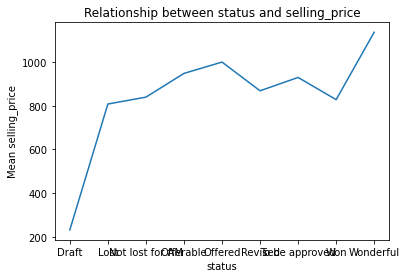

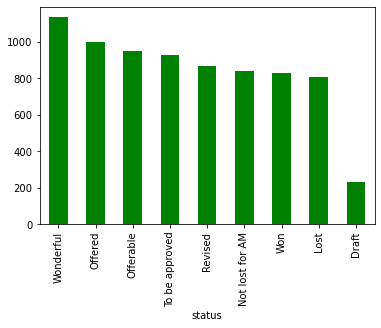

status
Wonderful          1136.000000
Offered             999.500000
Offerable           947.714286
To be approved      929.191094
Revised             868.107368
Not lost for AM     839.017692
Won                 827.609210
Lost                807.510571
Draft               231.500000
Name: selling_price, dtype: float64 

*************************************************


In [46]:
# for var in ['status','item type','material_ref']:

fig = plt.figure()
fig = y_train.groupby(X_train['status']).mean().plot()
fig.set_title("Relationship between {} and selling_price".format('status'))
fig.set_ylabel("Mean selling_price")
plt.show()
    
temp_df1 = y_train.groupby(X_train['status']).mean()
temp_df1.sort_values(ascending=False).plot.bar(color='green')
plt.show()
print(temp_df1.sort_values(ascending=False),'\n')
print('*************************************************')


    

In [47]:
X_test.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
dtype: int64

In [48]:
# Ordered ordinal encoding

status_ordered_labels = y_train.groupby(X_train["status"]).mean().sort_values().index

status_ordered_labels

Index(['Draft', 'Lost', 'Won', 'Not lost for AM', 'Revised', 'To be approved',
       'Offerable', 'Offered', 'Wonderful'],
      dtype='object', name='status')

In [49]:
status_ordinal_mapping = {k: i for i, k in enumerate(status_ordered_labels,0)}

status_ordinal_mapping

{'Draft': 0,
 'Lost': 1,
 'Won': 2,
 'Not lost for AM': 3,
 'Revised': 4,
 'To be approved': 5,
 'Offerable': 6,
 'Offered': 7,
 'Wonderful': 8}

In [51]:
# now, we replace the labels with the integers

X_train["status"] = X_train["status"].map(status_ordinal_mapping)
X_test["status"] = X_test["status"].map(status_ordinal_mapping)

### Ordered ordinal encoding for 'item type' column 

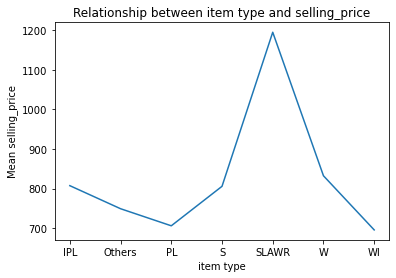

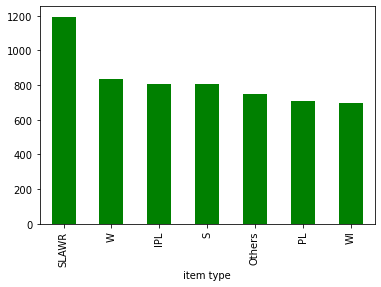

item type
SLAWR     1195.000000
W          832.411153
IPL        807.428571
S          805.766726
Others     749.188618
PL         706.026532
WI         695.632282
Name: selling_price, dtype: float64 

*************************************************


In [54]:
fig = plt.figure()
fig = y_train.groupby(X_train['item type']).mean().plot()
fig.set_title("Relationship between {} and selling_price".format('item type'))
fig.set_ylabel("Mean selling_price")
plt.show()

temp_df1 = y_train.groupby(X_train['item type']).mean()
temp_df1.sort_values(ascending=False).plot.bar(color='green')
plt.show()
print(temp_df1.sort_values(ascending=False),'\n')
print('*************************************************')

In [55]:
# Ordered ordinal encoding

itype_ordered_labels = y_train.groupby(X_train["item type"]).mean().sort_values().index

itype_ordered_labels

Index(['WI', 'PL', 'Others', 'S', 'IPL', 'W', 'SLAWR'], dtype='object', name='item type')

In [56]:
itype_ordinal_mapping = {k: i for i, k in enumerate(itype_ordered_labels,0)}

itype_ordinal_mapping

{'WI': 0, 'PL': 1, 'Others': 2, 'S': 3, 'IPL': 4, 'W': 5, 'SLAWR': 6}

In [57]:
# now, we replace the labels with the integers

X_train["item type"] = X_train["item type"].map(itype_ordinal_mapping)
X_test["item type"] = X_test["item type"].map(itype_ordinal_mapping)

### Mean encoding for the remaining columns 

In [59]:
def mean_encoding(variable):  
    fig = plt.figure()
    fig = y_train.groupby(X_train[variable]).mean().plot(figsize=(30,10))
    fig.set_title("Relationship between {} and selling_price".format(variable))
    fig.set_ylabel("Mean selling_price")
    plt.show()

    temp_df1 = y_train.groupby(X_train[variable]).mean()
    print(temp_df1.sort_values(ascending=False),'\n')
    print(len(temp_df1))
    print('*************************************************')
    
    ordered_labels = y_train.groupby(X_train[variable]).mean().to_dict()
    print('ordered_labels in {} column'.format(variable))
    print(ordered_labels,'\n')
    
    X_train[variable] = X_train[variable].map(ordered_labels)
    X_test[variable] = X_test[variable].map(ordered_labels)
    print('mean encoding in {} column done!'.format(variable))
    

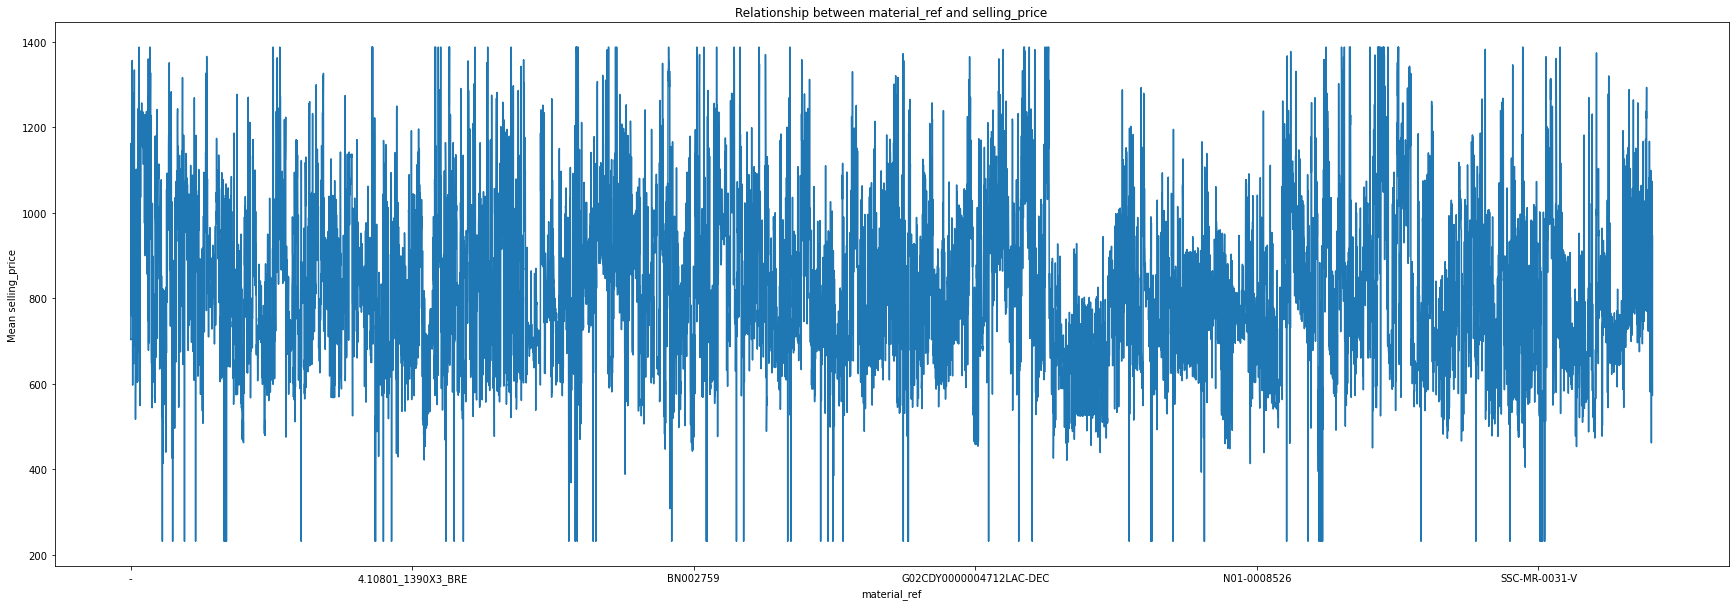

material_ref
R511-060             1387.5
RAL 9006             1387.5
A7B160451250         1387.5
41010648238F40ATL    1387.5
A68JG0401160         1387.5
                      ...  
H28017DX352           231.5
M005035               231.5
1.2X1310              231.5
1.2X870               231.5
84670786539US3CSA     231.5
Name: selling_price, Length: 10811, dtype: float64 

10811
*************************************************
ordered_labels in material_ref column
{'-': 703.8605577689243, '.': 703.0, '0,35X1050': 1162.0, '0,37X1260': 1122.6666666666667, '0,3X935 DC01 NET GENT': 834.0, '0,40X1000': 1138.3333333333333, '0,40X1000_DC01': 791.5, '0,40X1210_DC01': 759.0, '0,40X1310_DC01': 785.0, '0,45X1250MM DX51D Z275 MAC': 1092.0, '0,47X1250 HDS G7016': 1180.0, '0,47X1250 HDS G7021': 1356.2, '0,4X1290_IKEA_BL TABL E9130': 995.0, '0,4X641_IKEA_BL TABL': 1137.0, '0,4X641_IKEA_BL TABL E9130': 596.75, '0,4X678_IKEA_BL TABL': 1142.75, '0,4X678_IKEA_BL TABL E9130': 1046.0, '0,50X1000': 1012.6666

In [60]:
mean_encoding('material_ref')

In [61]:
X_test.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
material_ref     793
product_ref        0
delivery date      0
dtype: int64

**We can see that the null value count has been increased in the X_test['material_ref'] column**
- This is because some labels from the train_set has not been found in the test_set

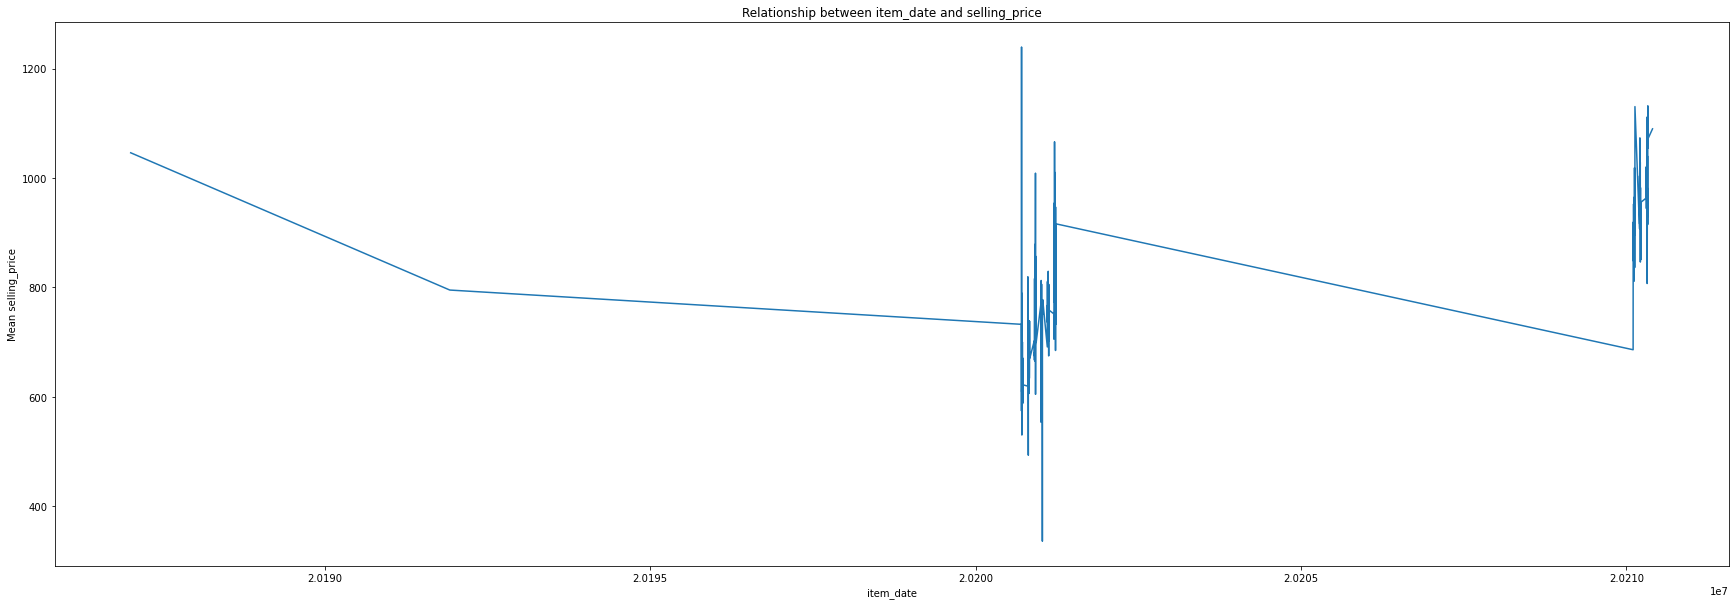

item_date
20200705.0    1239.400000
20210329.0    1131.856874
20210131.0    1130.416667
20210313.0    1111.000000
20210401.0    1089.738730
                 ...     
20200704.0     574.000000
20201004.0     553.421053
20200710.0     529.896751
20200809.0     493.027778
20201025.0     335.800000
Name: selling_price, Length: 250, dtype: float64 

250
*************************************************
ordered_labels in item_date column
{20187015.5: 1046.0, 20191919.0: 795.0, 20200702.0: 732.3414701803051, 20200703.0: 633.0856020942408, 20200704.0: 574.0, 20200705.0: 1239.4, 20200706.0: 668.5438855780691, 20200707.0: 608.954893267652, 20200708.0: 617.3063944954129, 20200709.0: 671.8866417910448, 20200710.0: 529.8967514124295, 20200712.0: 789.0833333333334, 20200713.0: 608.2283264746228, 20200714.0: 623.1177127659574, 20200715.0: 663.3933212996391, 20200716.0: 584.7958498896247, 20200717.0: 597.2883647798742, 20200718.0: 700.0, 20200719.0: 587.0, 20200720.0: 670.8656987295826, 20200721.0: 59

In [62]:
mean_encoding('item_date')

In [63]:
X_test.isnull().sum()

item_date          1
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
material_ref     793
product_ref        0
delivery date      0
dtype: int64

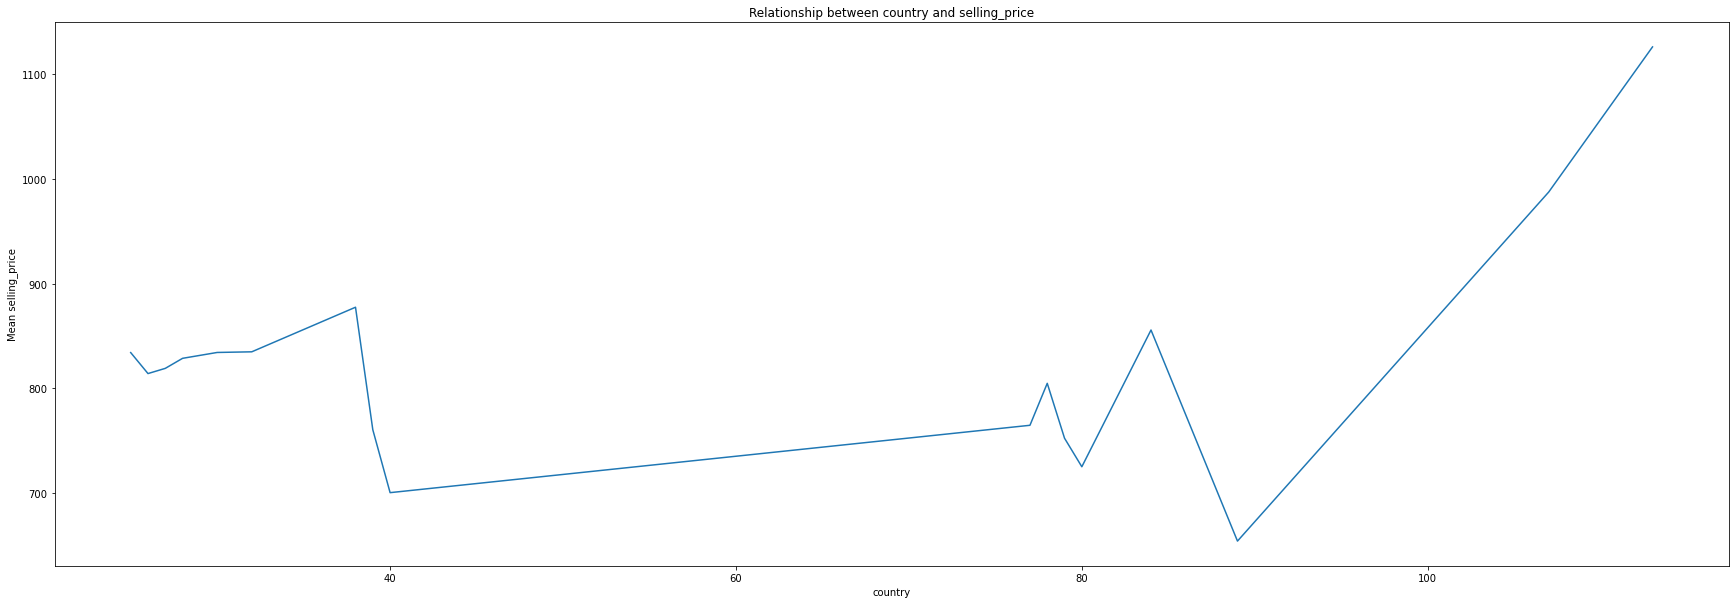

country
113.0    1126.278182
107.0     987.666667
38.0      877.570183
84.0      855.793486
32.0      834.967509
30.0      834.351588
25.0      834.240818
28.0      828.752566
27.0      819.153511
26.0      814.192327
78.0      804.860881
77.0      764.771304
39.0      760.540314
79.0      752.406875
80.0      725.152905
40.0      700.416539
89.0      654.135714
Name: selling_price, dtype: float64 

17
*************************************************
ordered_labels in country column
{25.0: 834.2408178574029, 26.0: 814.1923273328434, 27.0: 819.1535106844224, 28.0: 828.7525662650602, 30.0: 834.3515878070974, 32.0: 834.9675089211146, 38.0: 877.5701827242525, 39.0: 760.5403141361256, 40.0: 700.416539050536, 77.0: 764.7713043478261, 78.0: 804.8608807206627, 79.0: 752.4068746952706, 80.0: 725.1529051987768, 84.0: 855.7934863459038, 89.0: 654.1357142857142, 107.0: 987.6666666666666, 113.0: 1126.2781818181818} 

mean encoding in country column done!


In [64]:
mean_encoding('country')

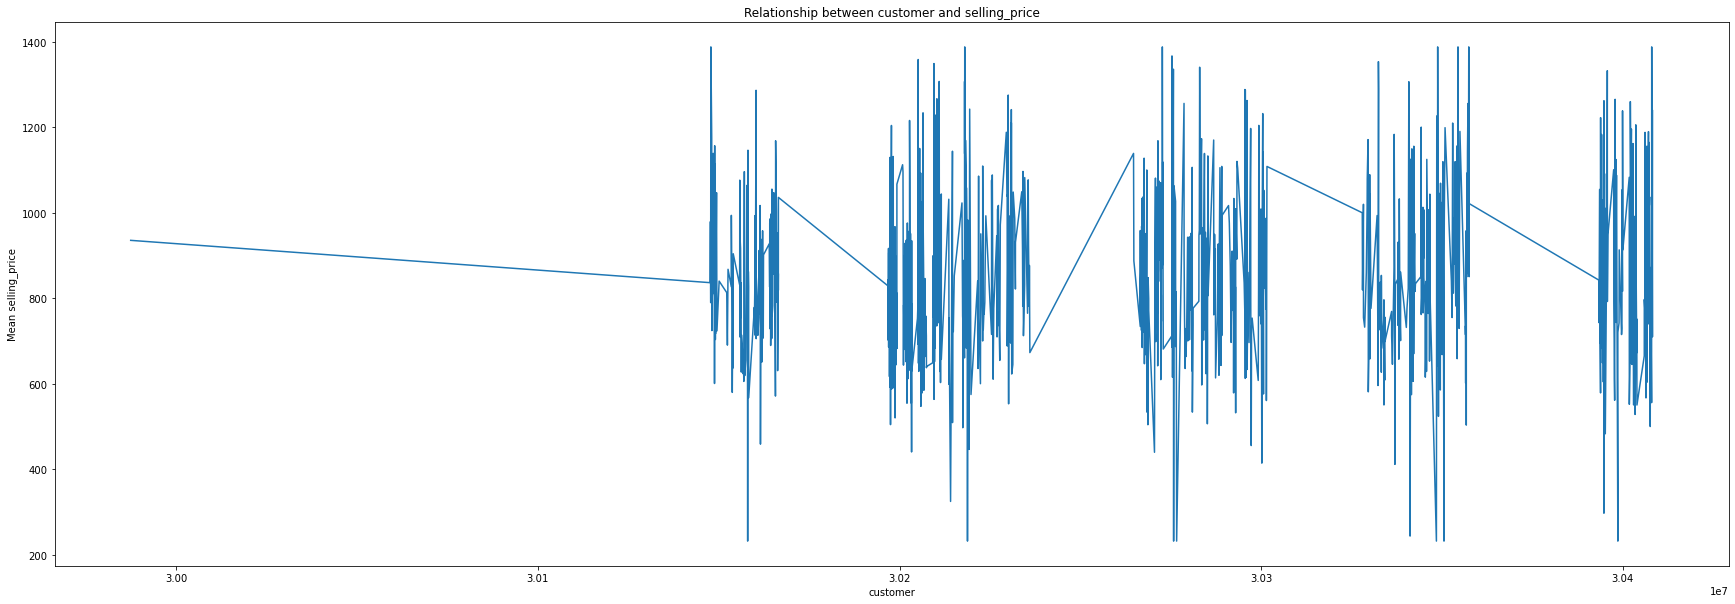

customer
30272666.0    1387.5
30147848.0    1387.5
30348788.0    1387.5
30357385.0    1387.5
30354406.0    1387.5
               ...  
30398602.0     231.5
30158020.0     231.5
30276619.0     231.5
30348439.0     231.5
30275784.0     231.5
Name: selling_price, Length: 1125, dtype: float64 

1125
*************************************************
ordered_labels in customer column
{29987446.0: 935.0, 30147620.0: 836.0370370370371, 30147722.0: 978.8521126760563, 30147800.0: 789.25, 30147802.0: 946.5, 30147848.0: 1387.5, 30148084.0: 1174.2, 30148135.0: 723.9130434782609, 30148347.0: 963.9512195121952, 30148496.0: 1138.5251396648046, 30148586.0: 1043.1977351916375, 30148629.0: 930.2666666666667, 30148743.0: 809.8888888888889, 30148806.0: 921.255, 30148822.0: 1051.4690265486727, 30148826.0: 1115.1176470588234, 30148849.0: 671.25, 30148854.0: 600.1428571428571, 30148901.0: 1156.313253012048, 30148907.0: 804.2058823529412, 30149080.0: 862.7718631178707, 30149089.0: 703.0678294573644, 30149105.0

In [65]:
mean_encoding('customer')

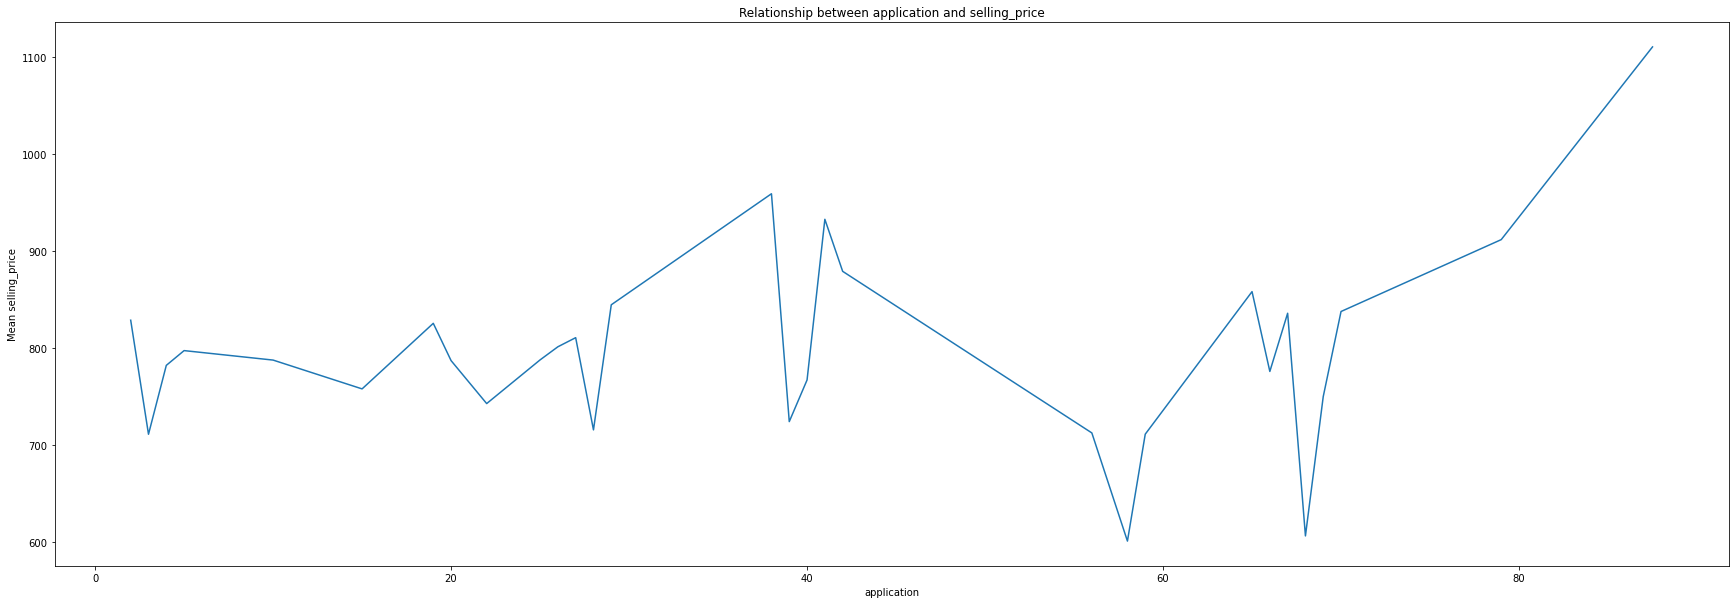

application
87.5    1110.537190
38.0     959.104430
41.0     932.759552
79.0     911.799434
42.0     879.104337
65.0     858.166667
29.0     844.602110
70.0     837.675000
67.0     835.873239
2.0      828.700000
19.0     825.485714
27.0     810.689229
26.0     801.294615
5.0      797.354512
25.0     787.767661
10.0     787.585780
20.0     787.033346
4.0      782.119681
66.0     775.859107
40.0     767.075536
15.0     757.871467
69.0     749.890625
22.0     742.729462
39.0     724.123377
28.0     715.605494
56.0     712.457081
59.0     711.168204
3.0      711.090000
68.0     606.252101
58.0     600.916905
Name: selling_price, dtype: float64 

30
*************************************************
ordered_labels in application column
{2.0: 828.7, 3.0: 711.09, 4.0: 782.1196808510638, 5.0: 797.354512195122, 10.0: 787.5857800427704, 15.0: 757.871467481515, 19.0: 825.4857142857143, 20.0: 787.0333456561922, 22.0: 742.7294625, 25.0: 787.7676606683805, 26.0: 801.2946153846154, 27.0: 810.689229249

In [66]:
mean_encoding('application')

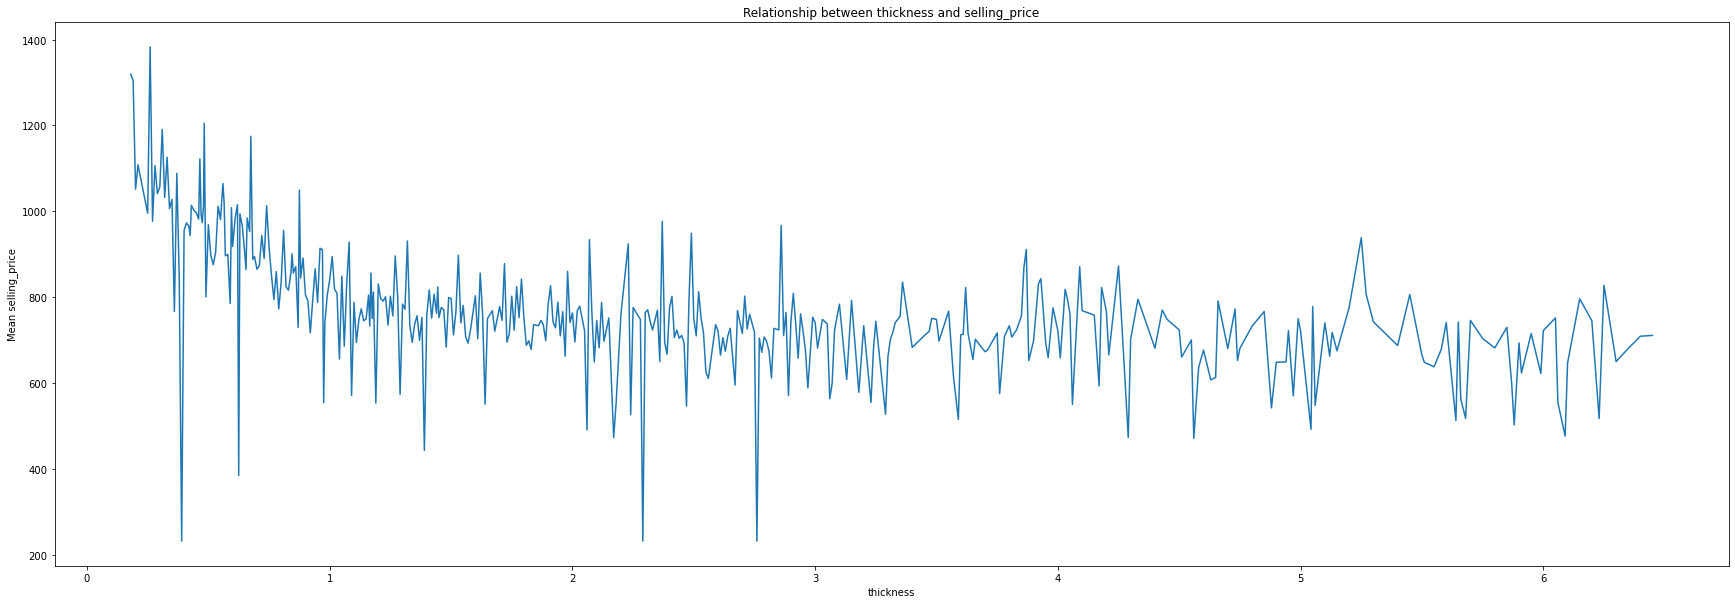

thickness
0.260    1383.000000
0.180    1319.500000
0.190    1304.928571
0.483    1205.000000
0.310    1190.666667
            ...     
1.390     442.750000
0.625     384.666667
2.760     231.500000
2.290     231.500000
0.390     231.500000
Name: selling_price, Length: 418, dtype: float64 

418
*************************************************
ordered_labels in thickness column
{0.18: 1319.5, 0.19: 1304.9285714285713, 0.2: 1051.5, 0.21: 1108.3181818181818, 0.25: 995.2173913043479, 0.26: 1383.0, 0.27: 976.5, 0.28: 1106.5844155844156, 0.29: 1040.8461538461538, 0.3: 1056.8791015625, 0.31: 1190.6666666666667, 0.32: 1032.325238095238, 0.33: 1125.806923076923, 0.34: 1006.1739130434783, 0.35: 1027.4736075949365, 0.36: 766.6877966101695, 0.37: 1088.3303030303032, 0.38: 845.7783613445379, 0.39: 231.5, 0.4: 955.7707588279488, 0.41: 973.0257142857143, 0.42: 964.537025, 0.425: 943.3333333333334, 0.43: 1013.822265625, 0.44: 1002.6666666666666, 0.45: 997.20391959799, 0.46: 981.6524025974026, 0.465: 

In [67]:
mean_encoding('thickness')

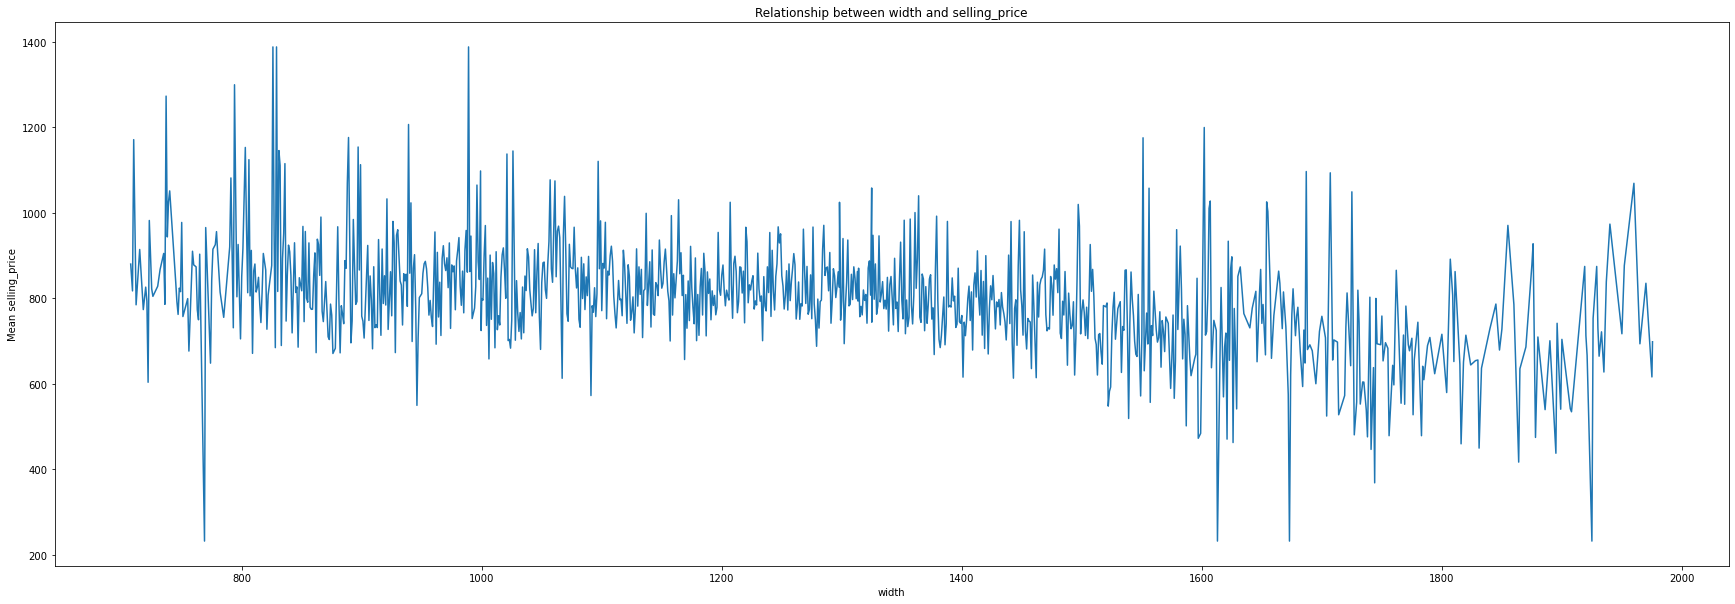

width
829.0     1387.50
826.0     1387.50
989.0     1387.50
794.0     1299.00
737.0     1272.40
           ...   
1744.0     367.75
1613.0     231.50
1925.0     231.50
769.0      231.50
1673.0     231.50
Name: selling_price, Length: 1010, dtype: float64 

1010
*************************************************
ordered_labels in width column
{707.5: 879.4974002418379, 709.0: 816.75, 710.0: 1170.5919354838709, 712.0: 784.2211111111111, 715.0: 913.639375, 718.0: 773.0, 720.0: 825.5689655172414, 721.0: 792.6666666666666, 722.0: 603.0, 723.0: 981.5, 725.0: 821.5714285714286, 726.0: 804.0, 730.0: 827.6666666666666, 732.0: 867.0, 735.0: 904.375, 736.0: 785.3333333333334, 737.0: 1272.4, 738.0: 943.0, 739.0: 1025.0, 740.0: 1050.7073170731708, 745.0: 838.0769230769231, 746.0: 791.5, 747.0: 761.75, 748.0: 823.1818181818181, 749.0: 815.0, 750.0: 976.8909230769232, 751.0: 756.732, 755.0: 798.6666666666666, 756.0: 676.0, 759.0: 909.5, 760.0: 877.6666666666666, 762.0: 873.0, 763.0: 772.37, 764.0: 749.

In [68]:
mean_encoding('width')

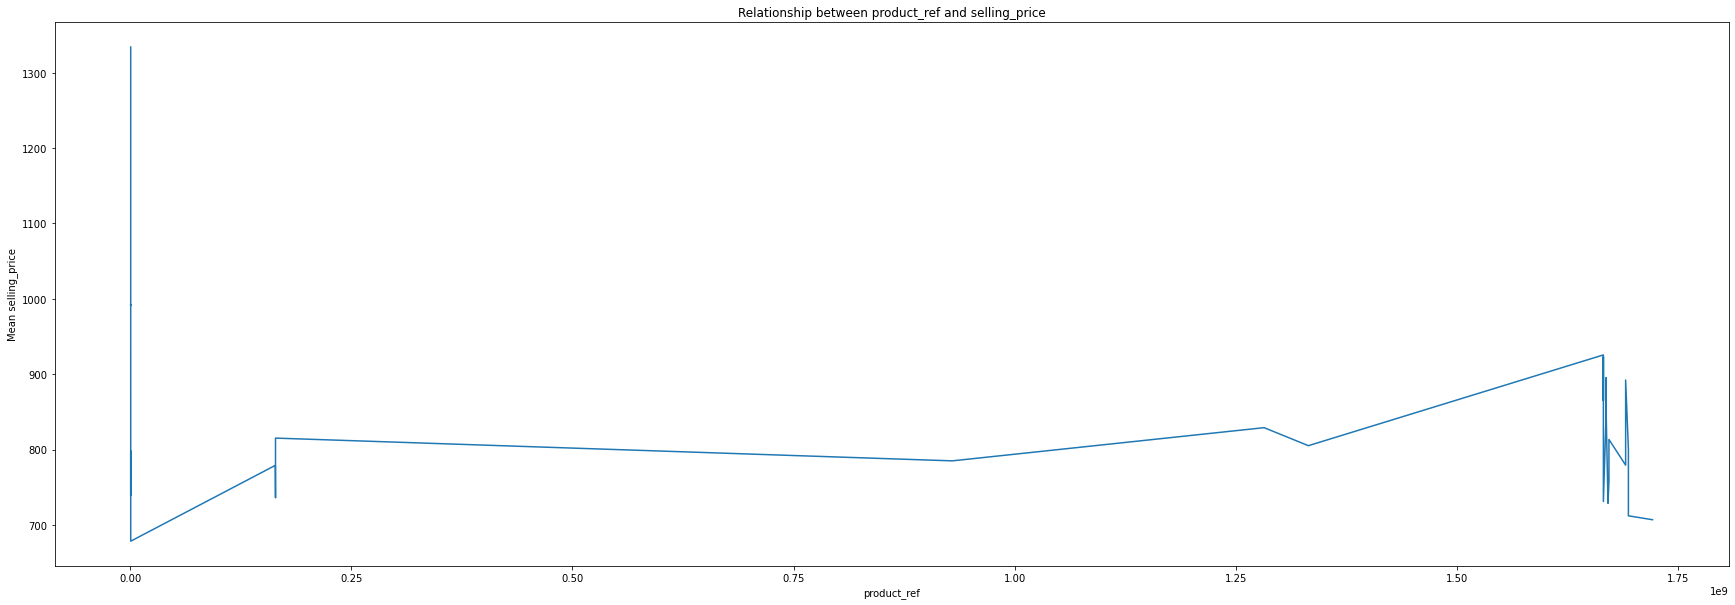

product_ref
611728        1334.126866
611993         992.519184
611733         990.810345
1665572032     925.555556
1665584320     923.200000
1668701698     895.561303
1690738219     892.333333
1668701718     879.511871
1665572374     864.977444
1668701725     850.790476
1668701376     849.337916
1282007633     829.045455
628112         817.919841
164337175      815.190120
1671876026     813.394293
1332077137     805.143964
1693867550     800.618250
640400         798.379231
628117         796.028117
929423819      785.000000
1690738206     779.325000
164141591      779.024949
1671863738     757.863215
640405         744.259542
628377         739.097662
164336407      736.000000
1665584662     731.000000
1670798778     728.665849
1693867563     712.096708
1721130331     706.866667
640665         678.418477
Name: selling_price, dtype: float64 

31
*************************************************
ordered_labels in product_ref column
{611728: 1334.1268656716418, 611733: 990.8103448275862

In [69]:
mean_encoding('product_ref')

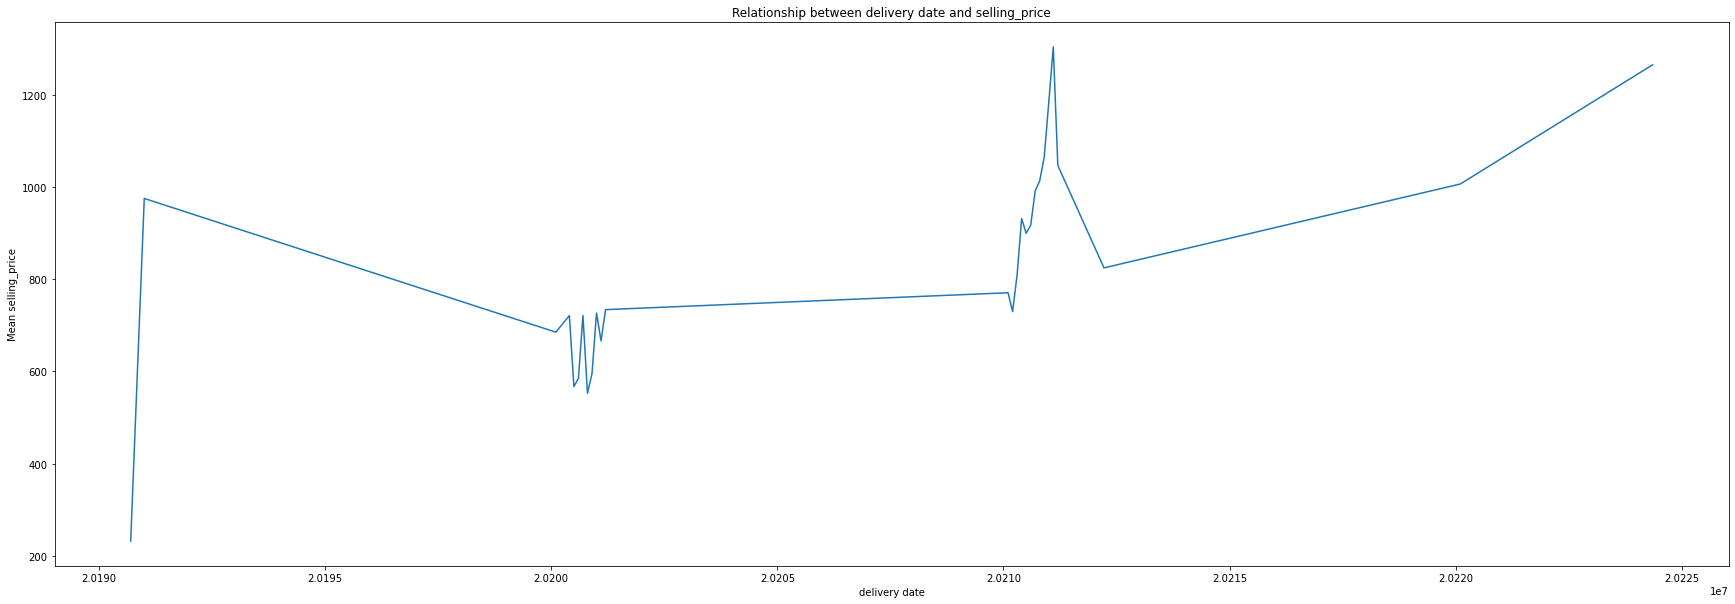

delivery date
20211101.0    1305.000000
20224351.0    1266.000000
20211001.0    1184.283688
20210901.0    1066.022950
20211201.0    1047.625000
20210801.0    1014.217283
20220101.0    1007.200000
20210701.0     991.804857
20191001.0     975.810000
20210401.0     932.071132
20210601.0     917.550933
20210501.0     900.093795
20212222.0     825.000000
20210301.0     809.922920
20210101.0     770.954204
20201201.0     734.282190
20210201.0     730.022362
20201001.0     726.787219
20200701.0     721.486547
20200401.0     721.177674
20200101.0     685.392577
20201101.0     666.357397
20200901.0     594.955774
20200601.0     585.040000
20200501.0     567.272727
20200801.0     552.509976
20190701.0     231.500000
Name: selling_price, dtype: float64 

27
*************************************************
ordered_labels in delivery date column
{20190701.0: 231.5, 20191001.0: 975.81, 20200101.0: 685.3925773195876, 20200401.0: 721.1776744186046, 20200501.0: 567.2727272727273, 20200601.0: 585.04, 2

In [70]:
mean_encoding('delivery date')

## Importing ML libraries

In [71]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [72]:
X_train.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
dtype: int64

In [73]:
X_test.isnull().sum()

item_date          1
quantity tons      0
customer           7
country            0
status             0
item type          0
application        0
thickness         10
width             21
material_ref     793
product_ref        0
delivery date      0
dtype: int64

**We can see that the null value count has been increased in the X_test set**
- This is because some labels from the train_set has not been found in the test_set

In [74]:
# Im creating a new column in the X_test called 'y_test' which contains all values from y_test
X_test['y_test']=y_test

In [75]:
X_test.shape

(31790, 13)

In [76]:
X_test.isnull().sum()

item_date          1
quantity tons      0
customer           7
country            0
status             0
item type          0
application        0
thickness         10
width             21
material_ref     793
product_ref        0
delivery date      0
y_test             0
dtype: int64

In [77]:
# Dropping all NaN rows from X_test

X_test.dropna(inplace=True)

In [78]:
#Creating a new y_test with no NaN values

y_test=X_test['y_test']

In [79]:
#Creating a new X_test with no NaN values

X_test=X_test[['item_date','quantity tons','customer','country','status','item type','application',
              'thickness','width','material_ref','product_ref','delivery date']]


In [80]:
X_test.shape,y_test.shape

((30960, 12), (30960,))

In [81]:
y_test.head()

131627     619.8
1668       874.0
164461     653.0
9141      1073.0
51582      781.0
Name: y_test, dtype: float64

In [82]:
# standardisation: with the StandardScaler from sklearn
# set up the scaler
scaler= StandardScaler()

# fit the scaler to the train set, to learn the parameters
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

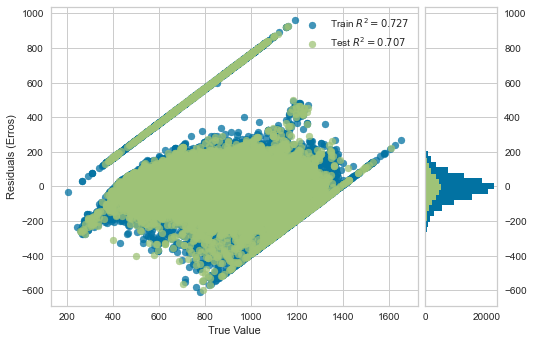

In [83]:
model = LinearRegression()
model.fit(X_train, y_train)

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel('True Value')
plt.ylabel('Residuals (Erros)')
plt.legend()
plt.show()

**We have a got a mean_squared_error of 73% in train_set**
**and 71% in the test_set**

*I think we have got off with a good start!*

## Feature selection with SHAP

In [84]:
#!pip install shap 

In [85]:
import shap

In [86]:
shap.initjs()

In [88]:
explainer = shap.KernelExplainer(model.predict, X_test[:103])

shap_values = explainer.shap_values(X_test, nsamples=100)

Using 103 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/30960 [00:00<?, ?it/s]

*Took nearly 2hrs computational time*

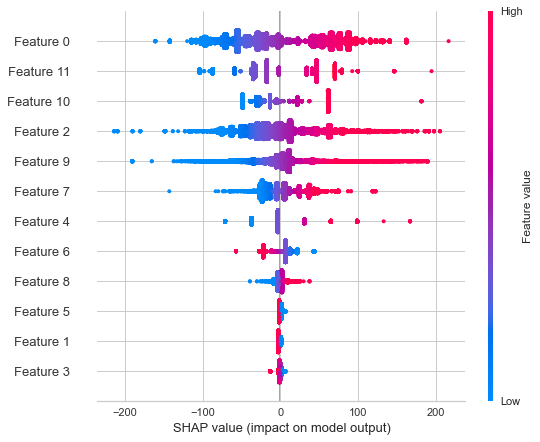

In [89]:
shap.summary_plot(shap_values, X_test)

In [90]:
model = LinearRegression().fit(X_test[:1003],y_test[:1003])

In [91]:
explainer = shap.Explainer(model, X_test[:1003])
shap_values = explainer(X_test[:1003])

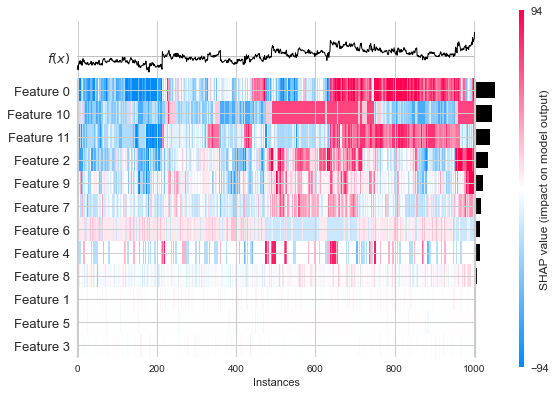

In [92]:
shap.plots.heatmap(shap_values,max_display=12)

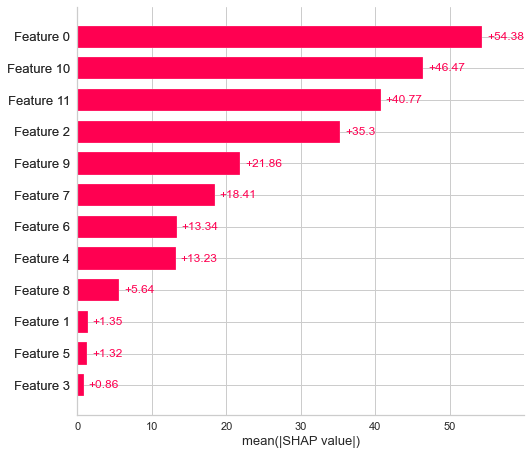

In [93]:
shap.plots.bar(shap_values, max_display=12)

In [1]:
features=['item_date','quantity tons','customer','country','status','item type','application',
              'thickness','width','material_ref','product_ref','delivery date']

imp_features=[features[0],features[2],features[4],features[6],features[7],features[8],
              features[9],features[10],features[11]]
least_imp_features=[features[1],features[3],features[5]]

print('imp_features:',imp_features,'\n')
print('least_imp_features:',least_imp_features)


imp_features: ['item_date', 'customer', 'status', 'application', 'thickness', 'width', 'material_ref', 'product_ref', 'delivery date'] 

least_imp_features: ['quantity tons', 'country', 'item type']


## We will do the Regression in CopperModelling_2.ipynb with the selected features